In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [85]:
class Strzyga:
  
    moveSet1 = ['l','b','b','a','r','a', 'r','r','r','a','r','t','t','a','t,','l','l','a','l','l'] #20 ruchów
    moveSet2 = ['l','l','r','r','t','t', 'b','b','a','a','a','a','a','a'] #aggressive version

    def __init__(self, x, y, random = False):
        self.x = x
        self.y = y
        self.hp = 3
        if not random:
            self.moveNo = 0
        self.turnsInCastleLeft = 0
        self.isDead = False

        
    def move(self, moveType, direction = (0,0)):
        if m[0] == 'attack':
            return [(self.x-1,self.y-1),(self.x-1,self.y),(self.x-1,self.y+1)]
        else: 
            self.x += m[1][0]
            self.y += m[1][1]
            return None
    
    def getPosition(self):
        return (x,y)
    
    def hit():
        self.hp -= 1
        if self.hp < 0:
            self.die()
        self.x = 8
        self.y = 1
        self.turnsInCastle = 3
            
    def die():
        self.isDead = True

In [86]:
class Wither:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def move(self, moveType, direction = (0,0)):
        if moveType == 'attack':
            return [(x+1,y+1)] #TODO wszystkie kierunki
        else: 
            self.x += direction[0]
            self.y += direction[1]
            return None
                
    def getPosition(self):
        return (x,y)

In [87]:
class GameMap: 
    board = np.array([[1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
                [1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
                [1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
                [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
               ]) #0 - nothing, 1 - wall
    
    def __init__(self, w, s):
        self.witcher = w
        self.strzyga = s
        
    def printMap(self):
        boardcopy = np.copy(self.board)
        boardcopy[self.witcher.y][self.witcher.x] = 2
        boardcopy[self.strzyga.y][self.strzyga.x] = 3
        plt.imshow(boardcopy, cmap='Set3')
        plt.show()
        
    def play(self, maxIter = 1000):
        for _ in range(maxIter):
            #ruch strzygi
            if self.strzyga.turnsInCastleLeft > 0:
                m = None
                self.strzyga.turnsInCastleLeft -= 1
            elif random:
                m = parseMove(self.strzyga.moveSet2[random.randint(0,14)])
            else:
                m = parseMove(self.strzyga.moveSet1[self.moveNo])
                self.strzyga.moveNo += 1
                self.strzyga.moveNo %= 20

            if m:
                if len(m) == 2:
                    attack = self.strzyga.move(m[0],m[1])
                else:
                    attack = self.strzyga.move(m[0])
            
            #ruch wiedzmina
#             self.witcher.move() #TODO co tutaj xD
            
        return
    
    def canMove(newPos, enemyPos):
        if newPos == enemyPos:
            return False
        elif self.board[newPos[0]][newPos[1]] == 1:
            return False
        return True

In [88]:
def parseMove(move):
    if move == 't':
        return ['move',(0,1)]
    elif move == 'b':
        return ['move',(0,-1)]
    if move in 'r':
        return ['move',(1,0)]
    elif move in 'l':
        return ['move',(-1,0)]
    else:
        return ['attack']

In [89]:
witcher = Wither(2,7)
strzyga = Strzyga(5,3, False)
game = GameMap(witcher,strzyga)

<IPython.core.display.Javascript object>


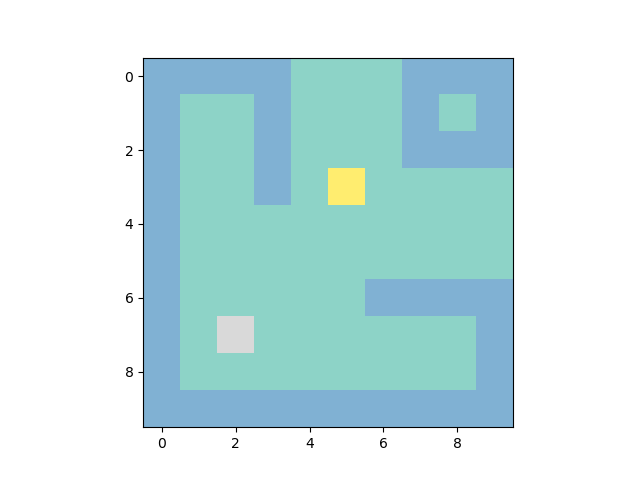

In [90]:
game.printMap()

In [91]:
game.play()

IndexError: list index out of range